## TODO
1. POS analysis

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import string
from sklearn.utils import resample

In [43]:
df = pd.read_csv('./flipkart_com-ecommerce_sample - flipkart_com-ecommerce_sample - flipkart_com-ecommerce_sample - flipkart_com-ecommerce_sample.csv')
df.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."


In [44]:
df.nunique(axis=0)

uniq_id                    20000
crawl_timestamp              371
product_url                20000
product_name               12676
product_category_tree       6466
pid                        19998
retail_price                2247
discounted_price            2448
image                      18589
is_FK_Advantage_product        2
description                17539
product_rating                36
overall_rating                36
brand                       3499
product_specifications     18825
dtype: int64

In [45]:
df.isnull().sum(axis = 0)

uniq_id                       0
crawl_timestamp               0
product_url                   0
product_name                  0
product_category_tree         0
pid                           0
retail_price                 78
discounted_price             78
image                         3
is_FK_Advantage_product       0
description                   2
product_rating                0
overall_rating                0
brand                      5864
product_specifications       14
dtype: int64

In [46]:
#description cannot be null
df.dropna(subset = ['description'], inplace = True)
df.dropna(subset = ['product_specifications'], inplace = True)

In [47]:
df.drop(['uniq_id', 'crawl_timestamp', 'product_url', 'image',
#          'product_rating', 'discounted_price',
         'pid'], axis =1 ,inplace=True)

In [48]:
import re
import numpy as np
def reduce(text):
    if text is np.nan:
        return None
    text = re.sub(r"{\"product_specification\"=>\[", '', text)
    text = re.sub(r"(\", ){0,1}\"value\"=>\"", ' ', text)   
    text = re.sub("\"key\"=>", '', text)
    text = re.sub(r"{\"{0,1}", '', text)
    text = re.sub("\"}", '', text)
    return text[:-2]

In [49]:
df["product_specifications"] = df['product_specifications'].apply(reduce)

In [50]:
#taking the first node of tree to be main category
import re
def categorize(text):
    # print(text)
    if re.search("\[\"", text):
        spos = re.search("\[\"", text).start()
        if re.search('>', text):
          pos = re.search('>', text).start()
        else:
          pos = len(text)-1
        return text[spos+2:pos-1]
    else:
        return text
df['Category'] = df['product_category_tree'].apply(categorize)

In [51]:
print("number of classes:", df["Category"].nunique())
print("class distribution:\n", df["Category"].value_counts().to_string())

number of classes: 265
class distribution:
 Clothing                                                6192
Jewellery                                               3530
Footwear                                                1225
Mobiles & Accessories                                   1098
Automotive                                              1012
Home Decor & Festive Needs                               927
Beauty and Personal Care                                 709
Home Furnishing                                          698
Kitchen & Dining                                         647
Computers                                                578
Watches                                                  530
Baby Care                                                483
Tools & Hardware                                         391
Toys & School Supplies                                   330
Pens & Stationery                                        313
Bags, Wallets & Belts                    

In [52]:
#removing categories with frequency < 100 with loss of 3.5% data
#since the data for those is too less as compared to others
#and from quick overview it is apparant that a lot of these dropped categories are specific to 1-2 products
# it is better to drop them
#this will also help us get a better metric for predictions of the model (like confusion matrix)
df = df.groupby('Category').filter(lambda x : (x['Category'].count()>=100).any())

In [53]:
# df["len"] = df['description'].str.split(' ').apply(lambda x : len(x))
# fig_dims = (20, 6)
# fig, ax = plt.subplots(figsize=fig_dims)
# plt.xticks(fontsize=14,rotation=90)
# # sns.stripplot(x="Category", y="len", ax=ax, data=df, alpha = 0.1)
# sns.violinplot( ax=ax, data=df.value_counts())

<AxesSubplot:title={'center':'Distribution Of Categories'}, xlabel='Category', ylabel='count'>

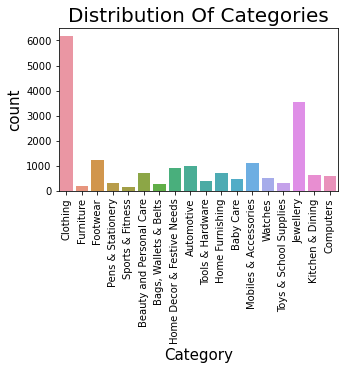

In [54]:
#Category count
fig_dims = (5, 3)
fig, ax = plt.subplots(figsize=fig_dims)
plt.title("Distribution Of Categories", fontsize=20)
plt.xlabel("Category", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.xticks(fontsize=10,rotation=90)
sns.countplot(x = "Category", ax=ax, data = df)

In [55]:
# resample code
# f_df={k:df[df['Category']==k] for k in set(df['Category'])}
# train_df=pd.concat([resample(data[100:], n_samples=1000, replace=True, random_state=123) for data in f_df.values()])
# valid_df=pd.concat([data[:100] for data in f_df.values()])

In [56]:
ip_addresses = df['Category'].unique()
ip_dict = dict(zip(ip_addresses, range(len(ip_addresses))))
df['product_category_tree'] = df['Category'].copy()
df = df.replace({'product_category_tree': ip_dict})

In [57]:
df['cleaned']=df['description'].apply(lambda x: x.lower())
df['cleaned']=df['cleaned'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))
df['cleaned']=df['cleaned'].apply(lambda x: re.sub('\w*\d\w*','', x))
df['cleaned']=df['cleaned'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))
df['cleaned']=df['cleaned'].apply(lambda x: re.sub(' +',' ',x))
for index,text in enumerate(df['cleaned'][35:40]):
  print('description %d:\n'%(index+1),text)

description 1:
 himmlisch magnetic sun shade for maruti alto side window price rs beat the heat this summer and feel like a vip with himmlisch car window magnetic sunshades these magnetic sunshades create a mesh layer to stops the heat magnet border gets easily stick to your car window door edges no need of suction cups features block uv rays keeps car cool easy to install and remove durable and exact fit provides complete privacy resists heat mesh type sunshade package contents x set of magnetic sunshadesspecifications of himmlisch magnetic sun shade for maruti alto side window general brand himmlisch model number magnetic placement position side window color black dimensions weight g depth cm in the box sales package sun shade pack of 
description 2:
 rapter bnc wire connector silver pack of price rs rapter pack of bnc connectorsuperior quality bnc connectors with high quality outer metel and brass conductors used to maintain a proper videosignal qualitybnc normally used in coaxial c

In [58]:
# to check brand redundancy
# note that 5000 brands are null
a = set()
for i, brand in enumerate(df[df['brand'].notnull()]['brand'].to_list()):
    if brand not in df['product_name'].to_list()[i]:
        a.add(brand)
print(len(list(a)), 'brands not in product name')

3230 brands not in product name


In [59]:
df['text'] = df['brand'] + ' ' + df['product_name'] + ' ' + df['cleaned']+ ' ' + df['product_specifications']

In [60]:
print("number of classes:", df["Category"].nunique())
print("class distribution:\n", df["Category"].value_counts().to_string())

number of classes: 18
class distribution:
 Clothing                      6192
Jewellery                     3530
Footwear                      1225
Mobiles & Accessories         1098
Automotive                    1012
Home Decor & Festive Needs     927
Beauty and Personal Care       709
Home Furnishing                698
Kitchen & Dining               647
Computers                      578
Watches                        530
Baby Care                      483
Tools & Hardware               391
Toys & School Supplies         330
Pens & Stationery              313
Bags, Wallets & Belts          265
Furniture                      180
Sports & Fitness               166


# EDA

## description lendth analysis

In [61]:
df.head()

,product_name,product_category_tree,retail_price,discounted_price,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,Category,cleaned,text
0,Alisha Solid Women's Cycling Shorts,0,999.0,379.0,False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"Number of Contents in Sales Package Pack of 3,...",Clothing,key features of alisha solid womens cycling sh...,Alisha Alisha Solid Women's Cycling Shorts key...
1,FabHomeDecor Fabric Double Sofa Bed,1,32157.0,22646.0,False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,Installation & Demo Details Installation and d...,Furniture,fabhomedecor fabric double sofa bed finish col...,FabHomeDecor FabHomeDecor Fabric Double Sofa B...
2,AW Bellies,2,999.0,499.0,False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"Ideal For Women, Occasion Casual, Color Red, O...",Footwear,key features of aw bellies sandals wedges heel...,AW AW Bellies key features of aw bellies sanda...
3,Alisha Solid Women's Cycling Shorts,0,699.0,267.0,False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"Number of Contents in Sales Package Pack of 2,...",Clothing,key features of alisha solid womens cycling sh...,Alisha Alisha Solid Women's Cycling Shorts key...
6,Alisha Solid Women's Cycling Shorts,0,1199.0,479.0,False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"Number of Contents in Sales Package Pack of 4,...",Clothing,key features of alisha solid womens cycling sh...,Alisha Alisha Solid Women's Cycling Shorts key...


In [62]:
#brand wise vis \
#product name word cloud
#pricing vs rating \
#what sort of products are rated \
#price vs category /
#word count analysis
#    by category /
#    specification
#check discounts /


In [63]:
# Contraction Mapping
# HyperLink Removal
# Extra Space removal /
# Character Composition
# Domain Features
# Lemmatization
# Spell Checks

(0.0, 1000.0)

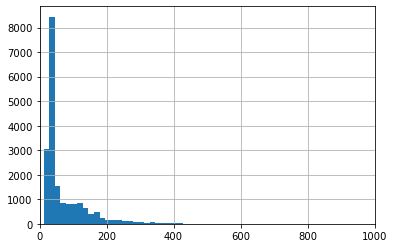

In [64]:
#length of words histogram
df["len"] = df['description'].str.split(' ').apply(lambda x : len(x))
df["len"].hist(bins = 100).set_xlim((0,1000))

In [65]:
#from above graph it is apparent that descriptions with len>500 are very less, removing them for better visualizaton of len
df = df.drop(df[(df['len'] <10) | (df['len']> 500)].index)

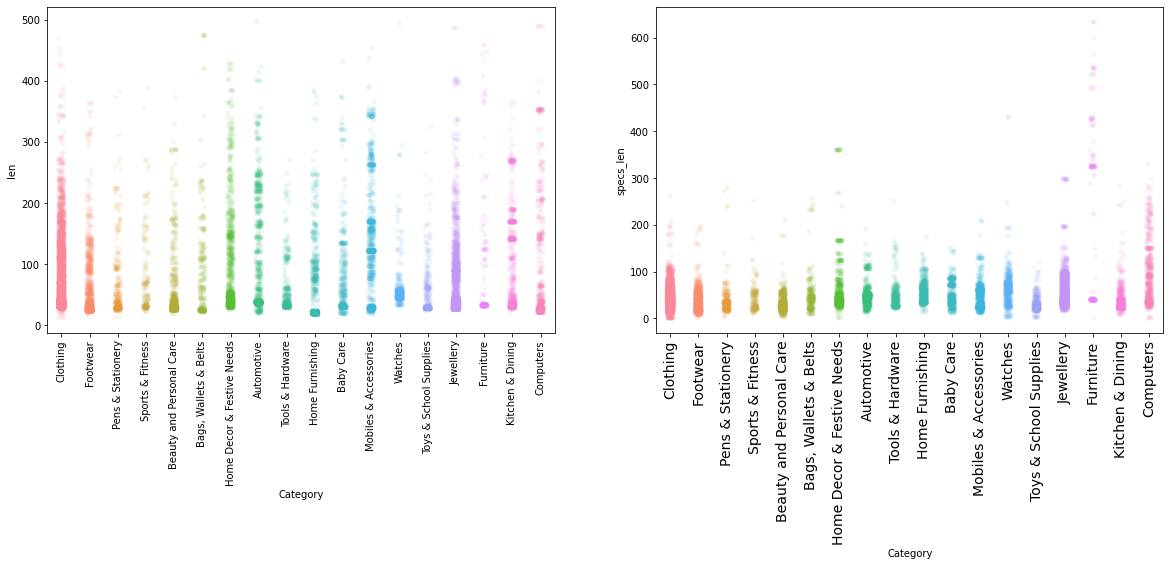

In [66]:
#number of words in description and in specifications by category
df["specs_len"] = df['product_specifications'].str.split(' ').apply(lambda x : len(x))
fig_dims = (20, 6)
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=fig_dims)
plt.xticks(fontsize=14,rotation=90)
g = sns.stripplot(x="Category", y="len", ax=ax[0], data=df, alpha = 0.1)
g.set_xticklabels(ax[0].get_xticklabels(), rotation=90)

f = sns.stripplot(x="Category", y="specs_len", ax=ax[1], data=df, alpha=0.1)
f.set_xticklabels(ax[1].get_xticklabels(), rotation=90)
plt.show()

In [67]:
#fixing rating to be numerical and setting no rating available to nan
df.loc[df['product_rating'] == 'No rating available', 'product_rating'] = np.nan
df['product_rating'] = pd.to_numeric(df['product_rating'])

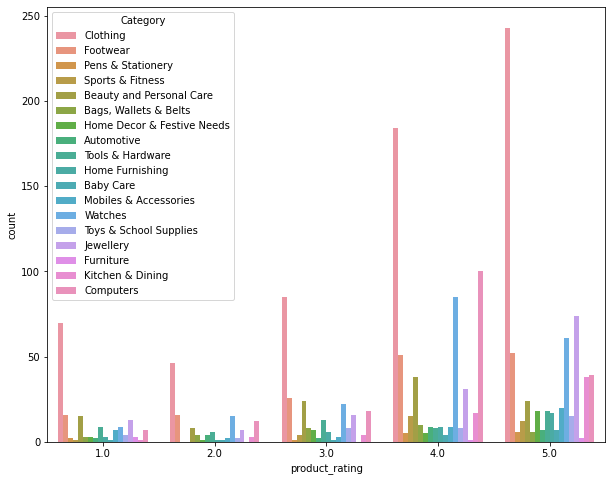

In [70]:
df['product_rating'] = df[df['product_rating'].notnull()]['product_rating'].round(0).astype(int)
fig_dims = (10, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(data = df, x="product_rating",ax = ax, hue = "Category")
plt.show()
#Observations: peple are more likely to rate 5, 4, and 1
#against general trend: computers, mobiles and beauty products have more 4 star ratings
#there isn't much data on ratings (only 10% of data has ratings) so we won't explore it any further

(0.0, 100.0)

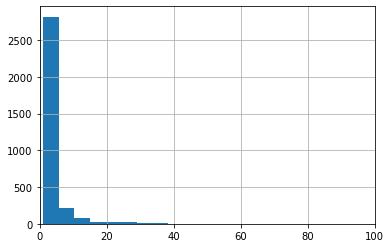

In [71]:
# most brands have only <10 products listed, note that ~5000 products have no brands
pd.Series(df['brand'].value_counts().values).hist(bins = 100).set_xlim((0,100))

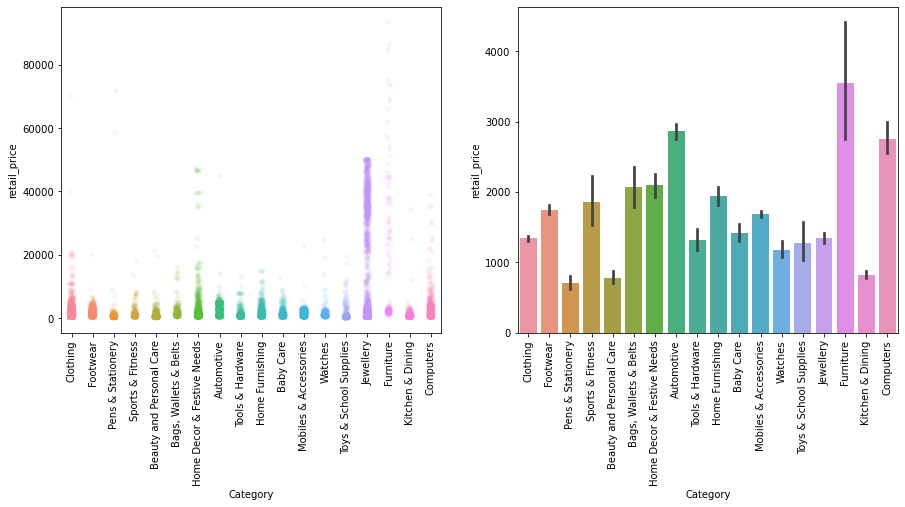

In [72]:
# fig, axes = plt.subplots(1, 2)
fig_dims = (15, 6)
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=fig_dims)
g = sns.stripplot(x="Category", y="retail_price", ax=ax[0], data=df[df["retail_price"]<100000], alpha = 0.1)
g.set_xticklabels(ax[0].get_xticklabels(), rotation=90)
f = sns.barplot(x="Category", y="retail_price", ax=ax[1], data=df[df["retail_price"]<20000])
f.set_xticklabels(ax[1].get_xticklabels(), rotation=90)
plt.show()

<AxesSubplot:xlabel='Category', ylabel='discount'>

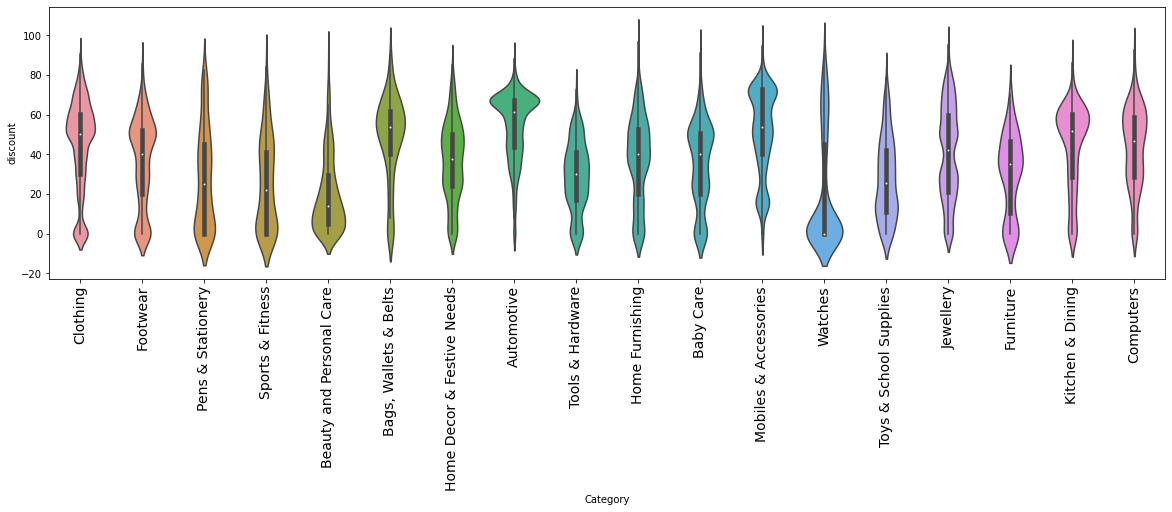

In [73]:
df['discount'] = (1- df['discounted_price']/df['retail_price'])*100
fig_dims = (20, 5)
fig, ax = plt.subplots(figsize=fig_dims)
plt.xticks(fontsize=14,rotation=90)
sns.violinplot(x="Category", y="discount", ax=ax, data=df)
# sns.barplot(x="Category", y="discount", ax=ax, data=df, alpha = 0.5, color = "green")

## Text analysis

In [74]:
corpus=' '.join(df['description']).lower()
chars=Counter(corpus)
# sorted(chars.items(), key=lambda i: i[1], reverse=True)

In [75]:
print(chars)

Counter({' ': 1351779, 'e': 678694, 'a': 499276, 'o': 469620, 't': 438413, 'r': 436354, 'i': 435083, 'n': 404995, 's': 394331, 'l': 349670, 'c': 266444, 'd': 219644, 'h': 194517, 'p': 193608, 'u': 180772, 'f': 164141, 'm': 159792, 'y': 146022, 'g': 139037, 'b': 112866, '.': 102151, 'w': 83167, 'k': 72644, 'v': 56314, ',': 40560, '0': 32030, '-': 27714, '\t': 27571, '1': 27376, '9': 24428, '\n': 22098, '3': 20018, ':': 18465, '2': 18306, '5': 15377, "'": 15058, 'x': 14453, '4': 13162, 'j': 10677, 'z': 10150, '8': 7955, '6': 7655, ')': 7628, '(': 7401, '!': 7209, 'q': 7048, '7': 6915, '&': 5762, '/': 3965, '"': 1369, '%': 1210, '_': 911, '#': 666, '\xa0': 652, '’': 542, '*': 527, ';': 377, '?': 342, '+': 326, '•': 319, '|': 224, '@': 154, 'é': 129, '”': 87, '�': 81, 'â': 70, '=': 67, '“': 66, '–': 58, '¢': 43, '…': 38, '°': 36, '\x80': 35, 'ã': 20, '®': 19, ']': 19, '[': 16, '✔': 15, '\\': 13, '‘': 12, '±': 12, '‚': 12, '~': 10, '\u2028': 10, '¡': 10, '\uf0d8': 8, '¬': 8, '⁃': 8, '\x84':

In [76]:
# #rethink
# contractions=Counter(re.findall("[a-z]+'[a-z]+", corpus))
# print(sorted(contractions.items(), key=lambda i: i[1], reverse=True))
# contractions=Counter(re.findall("[a-z]'[a-z]+", corpus))
# print(sorted(contractions.items(), key=lambda i: i[1], reverse=True))
# # print(Counter(re.findall("r\/[a-z]+", corpus)).most_common(10))
# # print(Counter(re.findall("u\/[a-z]+", corpus)).most_common(10))
# print(re.findall('\(*http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+#]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))*', corpus)[:10])
# print(sorted(Counter(re.findall("#[a-z]+",corpus)).items(), key=lambda i: i[1], reverse=True)[:10])
# print(Counter(re.findall("&[a-z;]+",corpus)).most_common(10))

In [77]:
from wordcloud import WordCloud ,STOPWORDS #WordClouds

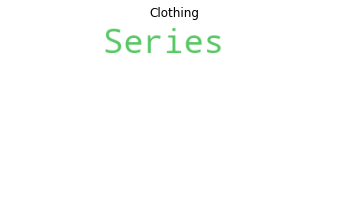

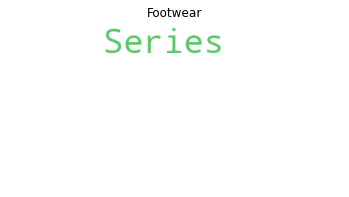

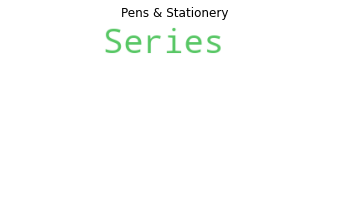

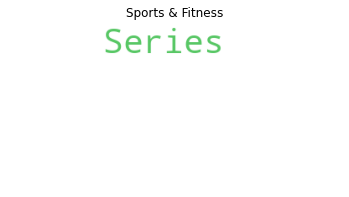

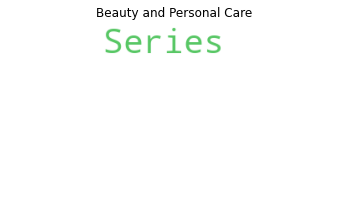

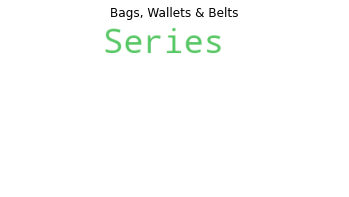

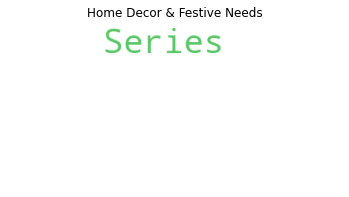

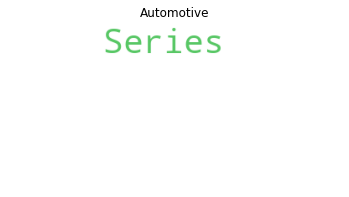

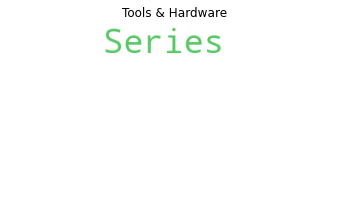

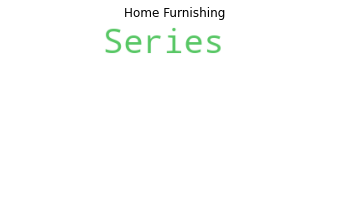

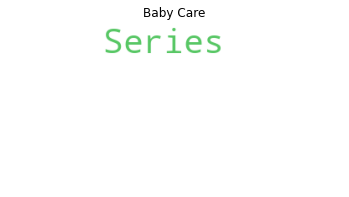

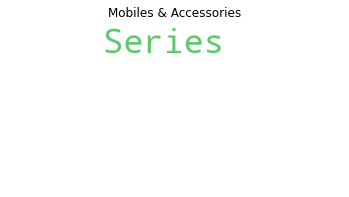

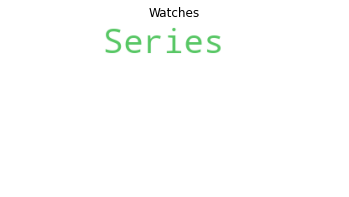

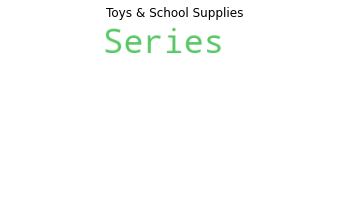

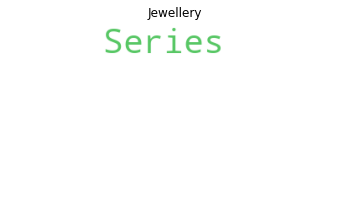

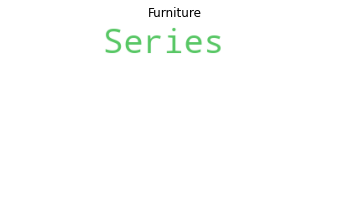

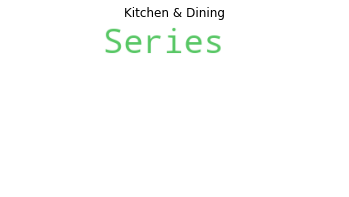

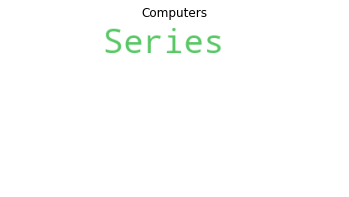

In [79]:
stopwords = set(STOPWORDS)

# generate word cloud and show it
for x in df.Category.unique():
    wc = WordCloud(background_color="white", max_words=2000, stopwords=stopwords,
                   max_font_size=40, random_state=42)
    wc.generate(df.description[(df.description.notnull()) & (df.description == x)].to_string())
    plt.imshow(wc)
    plt.title(x)
    plt.axis("off")
    plt.show()

In [3]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

ModuleNotFoundError: No module named 'wordcloud'

In [1]:
stopwords = set(STOPWORDS)

# generate word cloud and show it
for x in df.Category.unique():
	wc = WordCloud(background_color="white", max_words=2000, stopwords=stopwords,
                   max_font_size=40, random_state=42)
	wc.generate(df.description[(df.description.notnull()) & (df.description == x)].to_string())
	plt.imshow(wc)
	plt.title(x)
	plt.axis("off")
	plt.show()

NameError: name 'STOPWORDS' is not defined

In [509]:
dataset = df[['product_category_tree', 'text', 'Category']]

In [510]:
dataset.columns = ['ENCODE_CAT','TEXT', 'CATEGORY']

In [511]:
dataset.to_csv('./Flipkart.csv', index=False)